In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of the Data

In [2]:
df = pd.read_csv('../data/raw/data.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics

In [3]:
print(df.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### Distribution of Numerical Features

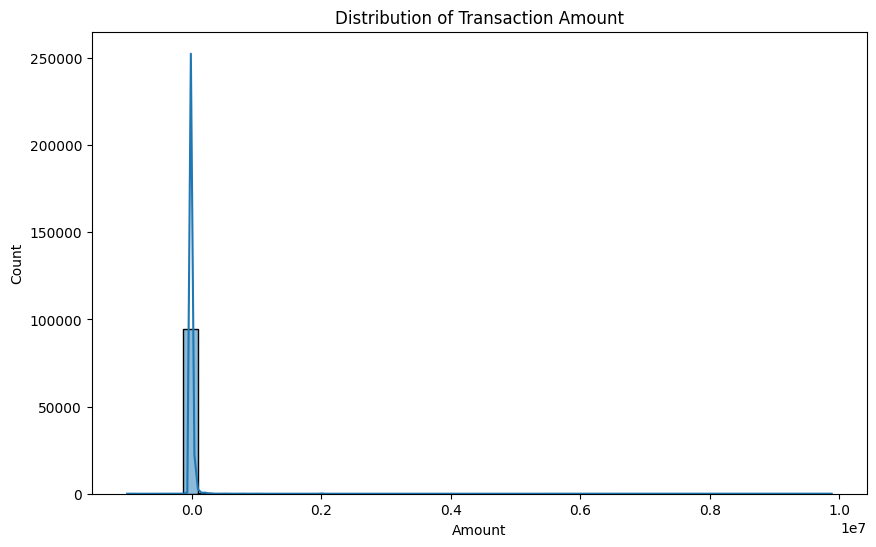

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.savefig('../notebooks/amount_distribution.png')
plt.show()

### Distribution of Categorical Features

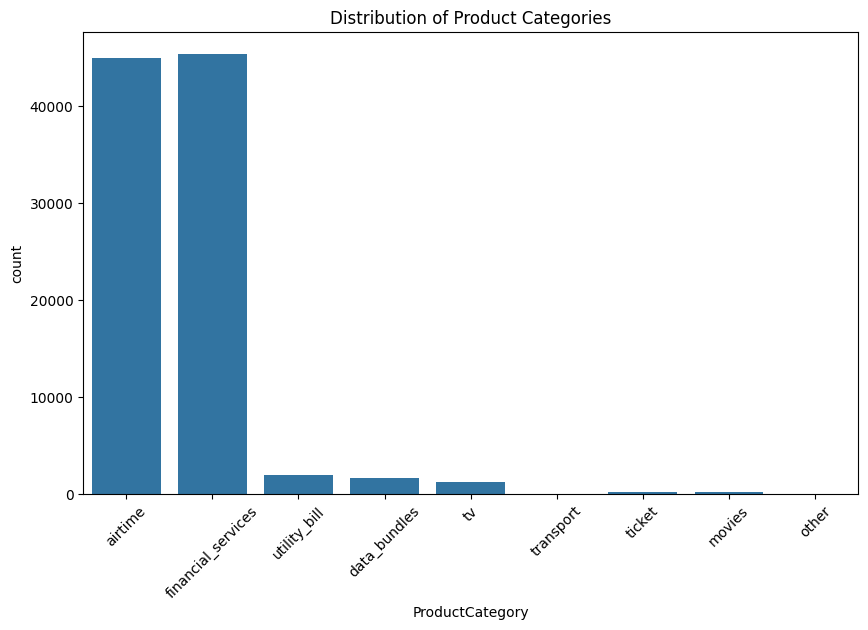

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Product Categories')
plt.savefig('../notebooks/product_category_distribution.png')
plt.show()

### Correlation Analysis

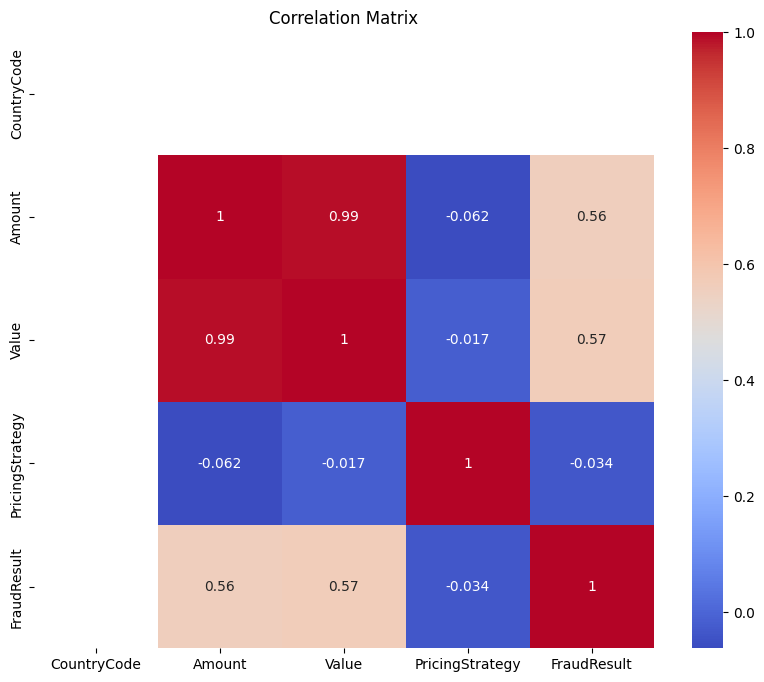

In [6]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../notebooks/correlation_matrix.png')
plt.show()

### Identifying Missing Value

In [7]:
print(df.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


### Outlier Detection

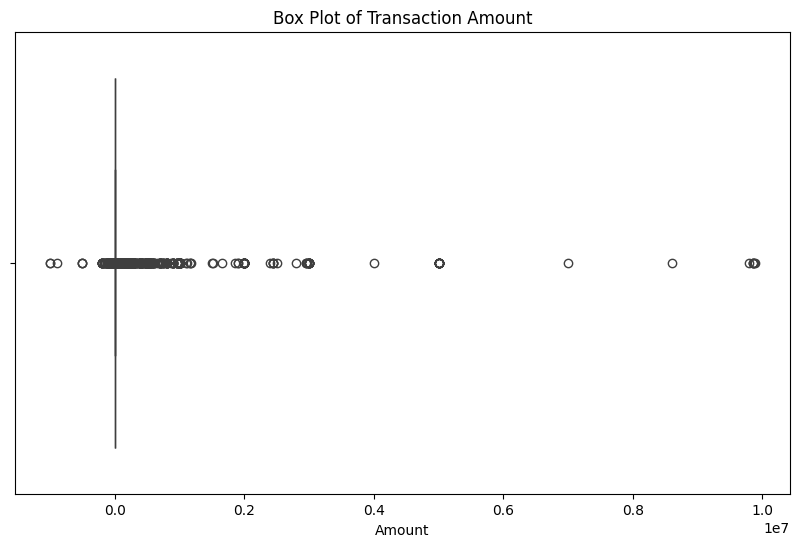

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.savefig('../notebooks/amount_boxplot.png')
plt.show()

### Key Insights from EDA

**Skewed Transaction Amounts**: The Amount column exhibits significant skewness, with most transactions being small in value but a few extreme outliers, as observed in the box plot. This suggests the need for transformations such as log-transformation or robust scaling to handle outliers effectively during modeling.

**Dominant Product Categories**: The dataset shows that transactions are concentrated in a few key product categories, such as airtime and financial_services. This indicates that these categories may have higher feature importance for predictive tasks and could be prioritized in feature engineering.

**No Missing Data**: The dataset has no missing values across all columns, as confirmed by the isnull().sum() output. This eliminates the need for imputation strategies and simplifies the preprocessing pipeline.

**Low Correlation Between Numerical Features**: The correlation matrix reveals weak correlations between numerical features like Amount, Value, PricingStrategy, and FraudResult. This suggests that derived features, such as RFM (Recency, Frequency, Monetary) metrics, may be necessary to capture more meaningful relationships for modeling.

